In [1]:
import pandas as pd
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
import numpy as np

## 1. Klaszterezés

Beolvassuk a lementett adatbázisunkat és csak a numerikusan kódolt feature-öket/változókat hagyjuk meg, minden mást kidobunk, ami nem használható a klaszteretéshez. A földrajzi és az éghajlat adatokat nem használjuk a klaszterezéshez, csak a kulturális változókat.

In [2]:
df= pd.read_csv('../data/numeric.csv')
data = df.drop(columns=["pref_name_for_society","Lat", "Long", "soc_id", "AnnualMeanTemperature", "MonthlyMeanPrecipitation"])
data.head()

,Community marriage organization_numeric,Cousin marriages permitted_numeric,Cousin marriages permitted: subtypes_numeric,Cousin marriages preferred_numeric,Cousin marriages preferred: subtypes_numeric,Domestic organization_numeric,Marital composition: monogamy and polygamy_numeric,Marital residence with kin: alternate_numeric,Marital residence with kin: change after first years_numeric,Marital residence with kin: first years_numeric,Marital residence with kin: prevailing pattern_numeric,Organization of clan communities_numeric,Transactions at marriage: alternate type_numeric,Transactions at marriage: prevailing type_numeric,Transfer of residence at marriage: alternate_numeric,Transfer of residence at marriage: prevailing pattern_numeric
0,3,5,2,7,4,2,0,6,1,11,11,2,5,0,2,3
1,3,5,2,7,4,2,0,5,1,11,11,2,4,4,0,3
2,0,0,4,7,4,2,0,5,0,10,2,2,4,4,2,0
3,0,0,4,7,4,7,0,6,1,11,11,2,1,3,2,3
4,4,3,7,14,3,7,4,5,1,8,8,2,4,1,0,3


### 1.1 HDBSCAN

Először a HDBSAN-t próbáljuk k. Csak egy hiperparamétert állítgatunk most: azt, hogy a klaszternek minimum hány elemet kell tartalmaznia.

In [3]:
hdb = HDBSCAN(min_cluster_size=10)
hdb.fit(data)
hdb.labels_

array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0

In [4]:
hdb = HDBSCAN(min_cluster_size=6)
hdb.fit(data)
hdb.labels_

array([-1, 15, -1, -1,  0, -1, 21, -1, 18, -1, -1, 19, -1, -1, -1, -1,  5,
        0, -1, -1, -1, -1, -1, -1, -1, -1,  7, -1, -1, -1, -1, -1, -1, -1,
        5,  1, -1, -1, -1, -1, -1, -1, -1, -1, 20, -1, -1,  7, -1, -1, 16,
       -1, -1, -1, -1,  6, 19, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  7,
       -1, -1, -1, -1, 17, -1, -1, -1, -1, -1, -1, -1,  0,  6, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, 16, 18, 18, -1, -1, -1, -1, -1, -1,  7,
       -1, -1, -1, -1, -1, 21, -1, -1, -1, -1, -1, 16, -1,  5, -1, -1, -1,
       -1, -1, -1, 18, -1,  7, -1, -1, -1, -1, -1, 21, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, 20,
       12, -1, 20, 16, -1, -1, -1, -1, 21, 20, 19, -1, -1, 17, -1, -1, -1,
       -1, -1, 17, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 21,  0, -1, -1,
       17, -1, 14, -1, -1

Láthatjuk, hogy a 10-es mimimum érték túl kevés klasztert eredményez, pontosan 2 darabot. Ha 6-ra állítjuk, akkor pedig túl sokat: 23 darabot. Inkább más metrikával  kísérletezünk tovább.

### K-means

In [5]:
kmeans = KMeans()
kmeans.fit(data)
kmeans.labels_

array([2, 2, 7, 6, 0, 5, 6, 0, 5, 2, 3, 6, 4, 0, 2, 2, 4, 0, 6, 6, 7, 3,
       6, 2, 0, 1, 4, 2, 6, 2, 7, 6, 3, 6, 4, 7, 6, 2, 3, 2, 6, 7, 4, 6,
       6, 2, 3, 4, 6, 2, 2, 1, 6, 5, 3, 4, 6, 0, 2, 0, 5, 0, 3, 1, 6, 6,
       0, 7, 4, 0, 6, 6, 3, 0, 6, 4, 5, 4, 2, 2, 6, 5, 7, 0, 1, 1, 0, 0,
       6, 3, 4, 3, 3, 6, 6, 3, 3, 4, 1, 3, 4, 4, 2, 3, 7, 3, 2, 6, 1, 3,
       1, 3, 3, 5, 0, 4, 1, 2, 7, 4, 0, 6, 6, 0, 6, 1, 2, 5, 5, 2, 2, 3,
       1, 1, 5, 4, 3, 3, 4, 2, 7, 6, 6, 1, 1, 5, 7, 2, 4, 4, 5, 1, 5, 6,
       5, 0, 5, 2, 4, 3, 4, 1, 6, 0, 6, 1, 2, 6, 2, 2, 0, 3, 0, 7, 4, 3,
       4, 4, 6, 0, 0, 3, 6, 5, 6, 6, 6, 5, 0, 6, 2, 1, 2, 6, 5, 6, 6, 6,
       6, 5, 2, 6, 6, 6, 2, 5, 2, 2, 3, 5, 1, 3, 2, 1, 2, 6, 6, 6, 0, 3,
       6, 2, 6, 2, 1, 4, 0, 6, 6, 5, 6, 3, 2, 3, 0, 0, 5, 4, 2, 5, 6, 6,
       6, 6, 2, 3, 3, 3, 2, 6, 2, 2, 4, 1, 7, 6, 2, 6, 5, 6, 6, 2, 6, 6,
       4, 7, 3, 6, 2, 2, 5, 4, 2, 6, 5, 2, 5, 0, 4, 1, 3, 3, 6, 6, 2, 2,
       4, 2, 7, 2, 3, 0, 6, 6, 6, 6, 5, 5, 4, 5, 3,

Láthatjuk, hogy k-means-szel 8 klasztert azonosítottunk, ami ideális, így ezzel megyünk tovább. A kultúrákra kapott klaszterbesorolásokat hozzáillesztjük a már meglévő adatbázisunkhoz.

In [6]:
k_labels = kmeans.labels_
print(k_labels)

[2 2 7 6 0 5 6 0 5 2 3 6 4 0 2 2 4 0 6 6 7 3 6 2 0 1 4 2 6 2 7 6 3 6 4 7 6
 2 3 2 6 7 4 6 6 2 3 4 6 2 2 1 6 5 3 4 6 0 2 0 5 0 3 1 6 6 0 7 4 0 6 6 3 0
 6 4 5 4 2 2 6 5 7 0 1 1 0 0 6 3 4 3 3 6 6 3 3 4 1 3 4 4 2 3 7 3 2 6 1 3 1
 3 3 5 0 4 1 2 7 4 0 6 6 0 6 1 2 5 5 2 2 3 1 1 5 4 3 3 4 2 7 6 6 1 1 5 7 2
 4 4 5 1 5 6 5 0 5 2 4 3 4 1 6 0 6 1 2 6 2 2 0 3 0 7 4 3 4 4 6 0 0 3 6 5 6
 6 6 5 0 6 2 1 2 6 5 6 6 6 6 5 2 6 6 6 2 5 2 2 3 5 1 3 2 1 2 6 6 6 0 3 6 2
 6 2 1 4 0 6 6 5 6 3 2 3 0 0 5 4 2 5 6 6 6 6 2 3 3 3 2 6 2 2 4 1 7 6 2 6 5
 6 6 2 6 6 4 7 3 6 2 2 5 4 2 6 5 2 5 0 4 1 3 3 6 6 2 2 4 2 7 2 3 0 6 6 6 6
 5 5 4 5 3 3 7 7 1 6 2 2 5 5 6 6 2 6 4 2 1 3 4 6 6 6 6 6 3 5 2 2 0 5 5 2 5
 5 5 5 6 1 4 1 3 1 7 3 5 0 5 5 1 6 2 0 2 2 2 6 2 5 2 6 6 4 4 5 4 1 7 2 1 0
 5 1 2 2 2 1 2 6 1 3 6 7 6 6 3 7 2 6 7 2 4 3 4 3 0 2 2 2 1 1 6 2 4 5 5 2 6
 2 2 6 0 5 5 1 6 6 1 5 2 2 2 2 2 5 5 2 5 6 7 5 6 4 1 4 1 2 4 3 2 0 2 2 2 6
 6 2 6 6 3 6 2 5 6 6 6 3 7 2 5 2 7 2 3 1 3 0 5 6 5 3 2 6 3 0 2 6 2 5 2 5 6
 3 3 4 2 0 0 2 2 6 6 4 1 

In [7]:
df["labels"] = k_labels

In [8]:
df.to_csv('../data/numeric_with_labels.csv', index=False)

In [9]:
## 2. Eredmények

### 2.1 Scatter plot

A kapott klasztereket beszínezzük a már ismert scatter ploton, hogy megkássuk, hogy az EDA során látott csoportok egybeesnek-e valamennyire a klaszterekkel.

In [10]:
df_2 = pd.read_csv('../data/twodimensions.csv')

In [11]:
df_2["labels"] = k_labels
df_2.head()

,xs,ys,ts,labels
0,10.813489,-1.739437,Yahgan,2
1,11.312573,-1.586706,Ona,2
2,15.235704,0.420012,Alacaluf,7
3,11.271083,3.521138,Tehuelche,6
4,15.750019,10.456098,Mapuche,0


In [12]:
import altair as alt

alt.Chart(df_2).mark_circle(size=60).encode(
    x='xs:Q',
    y='ys:Q',
    color="labels",
    tooltip='ts',
).properties(width=800, height=800).interactive()

alt.Chart(...)

Látunk némi átfedést a csoportosulások és a klaszterek között.

### 2.2 A klaszterek összevetése az éghajlat adatok mentén

Arra vagyunk kíváncsia, hogy eltérőek-e a klaszterekbe tartozó kultúrák/társadalmak éghajlata

Kimásoljuk a beolvasott adattáblából a korábban kiválasztott éghajlati változókat és a klaszter címkéket.

In [13]:
df_new = df[['AnnualMeanTemperature', 'MonthlyMeanPrecipitation', 'labels']].copy()

In [14]:
df_new.head()

,AnnualMeanTemperature,MonthlyMeanPrecipitation,labels
0,4.040226,106173.97620,2
1,3.673221,99406.99295,2
2,5.833743,135790.88890,7
3,5.156873,51252.80265,6
4,10.339714,41571.08374,0


Csoportosítjuk a klasztereket átlaghőmérséklet és csapadékátlag szerint.

In [15]:
df_new.groupby(by=["labels"]).mean()

,AnnualMeanTemperature,MonthlyMeanPrecipitation
labels,,
0,18.822287,129983.953287
1,19.409666,128273.272900
2,17.926735,111635.373173
3,21.602719,104332.239341
4,14.419153,117290.234580
5,21.369956,133821.222052
6,18.561235,113855.969614
7,12.457506,97068.924088


In [16]:
df_means = df_new.groupby(by=["labels"]).mean()
df_final = df_means.reset_index()
df_final.head()

,labels,AnnualMeanTemperature,MonthlyMeanPrecipitation
0,0,18.822287,129983.953287
1,1,19.409666,128273.272900
2,2,17.926735,111635.373173
3,3,21.602719,104332.239341
4,4,14.419153,117290.234580


Oszlopdiagramon ábrázoljuk a klaszterbe tartozó átlaghőmérsékletek átlagát.

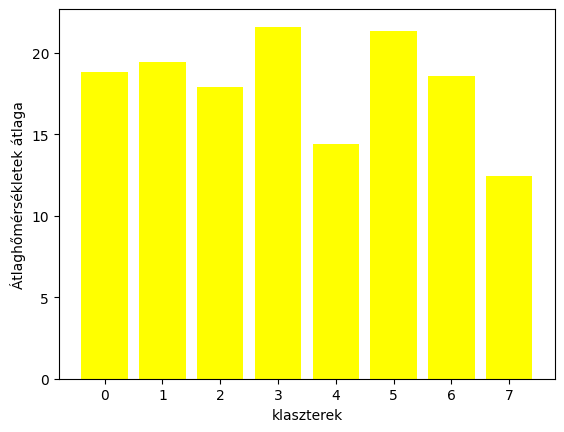

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = df_final["labels"]
y = df_final["AnnualMeanTemperature"]

plt.bar(x, y, color ="yellow")
plt.xlabel('klaszterek')
plt.ylabel('Átlaghőmérsékletek átlaga')
plt.show()

Megállapíthatjuk, hogy a klaszterek átlaghőmérséklet átlagai eltérőek.

Oszlopdiagramon ábrázoljuk a klaszterbe tartozó csapadékátlagok átlagát.

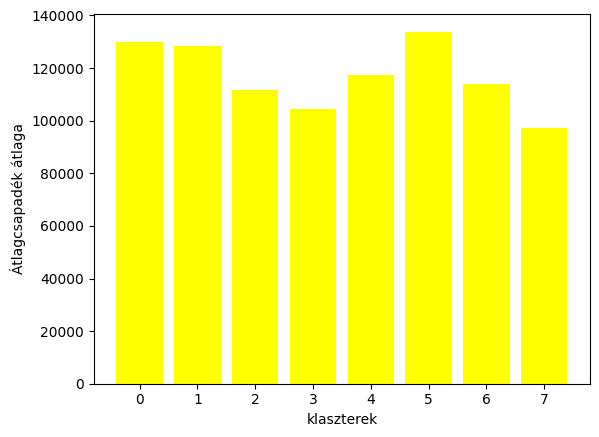

In [18]:
import matplotlib.pyplot as plt

x = df_final["labels"]
y = df_final["MonthlyMeanPrecipitation"]

plt.bar(x, y, color ="yellow")
plt.xlabel('klaszterek')
plt.ylabel('Átlagcsapadék átlaga')
plt.show()

Megállapíthatjuk, hogy a klaszterek csapadékátlagainak átlagai többnyire eltérőek.

### 2.3 Térképen ábrázoljuk az eredményeket

Térképre tesszük a kultúrákat/társadalmakat és azonos színnel beszínezzük az azonos klaszterbe tartozókat. Tanulmányozzuk a térképet, hogy "ránézésre" látunk-e pl. éghajlati övenkénti klaszter elrendeződést.

In [20]:
import altair as alt
import pandas as pd
from vega_datasets import data

df_plot=pd.read_csv("../data/numeric_with_labels.csv")

In [21]:
df_plot.head()

,Lat,Long,pref_name_for_society,soc_id,Community marriage organization_numeric,Cousin marriages permitted_numeric,Cousin marriages permitted: subtypes_numeric,Cousin marriages preferred_numeric,Cousin marriages preferred: subtypes_numeric,Domestic organization_numeric,...,Marital residence with kin: first years_numeric,Marital residence with kin: prevailing pattern_numeric,Organization of clan communities_numeric,Transactions at marriage: alternate type_numeric,Transactions at marriage: prevailing type_numeric,Transfer of residence at marriage: alternate_numeric,Transfer of residence at marriage: prevailing pattern_numeric,AnnualMeanTemperature,MonthlyMeanPrecipitation,labels
0,-55.02,-68.98,Yahgan,Sg1,3,5,2,7,4,2,...,11,11,2,5,0,2,3,4.040226,106173.97620,2
1,-54.00,-69.00,Ona,Sg3,3,5,2,7,4,2,...,11,11,2,4,4,0,3,3.673221,99406.99295,2
2,-52.00,-74.00,Alacaluf,Sg5,0,0,4,7,4,2,...,10,2,2,4,4,2,0,5.833743,135790.88890,7
3,-46.00,-70.00,Tehuelche,Sg4,0,0,4,7,4,7,...,11,11,2,1,3,2,3,5.156873,51252.80265,6
4,-39.00,-68.00,Mapuche,Sg2,4,3,7,14,3,7,...,8,8,2,4,1,0,3,10.339714,41571.08374,0


In [22]:
source = alt.topo_feature(data.world_110m.url, 'countries')
background = alt.Chart(source).mark_geoshape(
    fill='lightgray',
    stroke='white'
    ).properties(
    width=700,
    height=600
)
domain = [0,1,2,3,4,5,6,7,8]
range = ["red", "blue", "green", "black", "violet", "gold", "yellow", "orange"]
points = alt.Chart(df_plot).mark_circle().encode(
    longitude='Long',
    latitude='Lat',
    size=alt.value(50),
    color=alt.Color("labels", scale=alt.Scale(domain=domain,range=range)).title("Klaszterek"),
    tooltip="pref_name_for_society",
).properties().interactive()

chart = background + points
chart

alt.LayerChart(...)